## Image processing

In [2]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os

In [5]:
transform = transforms.ToTensor()

In [6]:
data_dir = './label/'
os.makedirs(os.path.join(data_dir, 'class1'), exist_ok=True)

In [7]:
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

In [8]:
dataset[0]

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 0)

In [9]:
image, label = dataset[0]

In [10]:
image

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

## Image skeletonization

In [29]:
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.util import invert
import skimage as ski
from skimage.filters import threshold_otsu

In [15]:
files = os.listdir(data_dir+'/class1')

In [16]:
files

['nj_100_1_LCA_RAO.png',
 'nj_100_2_LCA_LAO.png',
 'nj_101_1_LCA_RAO.png',
 'nj_101_2_LCA_RAO.png',
 'nj_102_1_LCA_RAO.png',
 'nj_102_2_LCA_RAO.png',
 'nj_102_3_RCA_LAO.png',
 'nj_102_4_RCA_RAO.png',
 'nj_103_1_LCA_RAO.png',
 'nj_103_2_LCA_LAO.png',
 'nj_104_1_LCA_RAO.png',
 'nj_104_2_LCA_RAO.png',
 'nj_104_3_RCA_LAO.png',
 'nj_104_4_RCA_LAO.png',
 'nj_105_1_LCA_RAO.png',
 'nj_105_2_LCA_LAO.png',
 'nj_106_1_LCA_RAO.png',
 'nj_106_2_LCA_LAO.png',
 'nj_106_3_RCA_LAO.png',
 'nj_106_4_RCA_RAO.png',
 'nj_107_1_LCA_RAO.png',
 'nj_107_2_LCA_RAO.png',
 'nj_107_3_RCA_LAO.png',
 'nj_107_4_RCA_RAO.png',
 'nj_108_1_LCA_RAO.png',
 'nj_108_2_LCA_RAO.png',
 'nj_109_1_LCA_RAO.png',
 'nj_109_2_LCA_LAO.png',
 'nj_109_3_RCA_LAO.png',
 'nj_109_4_RCA_RAO.png',
 'nj_10_LCA_LAO.png',
 'nj_10_LCA_RAO.png',
 'nj_10_RCA_LAO.png',
 'nj_10_RCA_LAO1.png',
 'nj_110_1_LCA_LAO.png',
 'nj_110_2_LCA_RAO.png',
 'nj_111_1_LCA_RAO.png',
 'nj_111_2_LCA_LAO.png',
 'nj_112_1_LCA_LAO.png',
 'nj_112_2_LCA_RAO.png',
 'nj_113_1_

In [18]:
images_list = []

In [20]:
for i in files:
    images_list.append(ski.io.imread(data_dir+'/class1/'+i))

In [41]:
images_list[0][0]

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [25]:
skeleton = skeletonize(images_list[0])

In [27]:
skeleton

array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [32]:
gray_image = ski.color.rgb2gray(images_list[0])

In [37]:
gray_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
thresh = threshold_otsu(gray_image)
binary_image = gray_image > thresh
binary_image = binary_image.astype(np.float32)

In [38]:
binary_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [34]:
skeleton = skeletonize(binary_image)

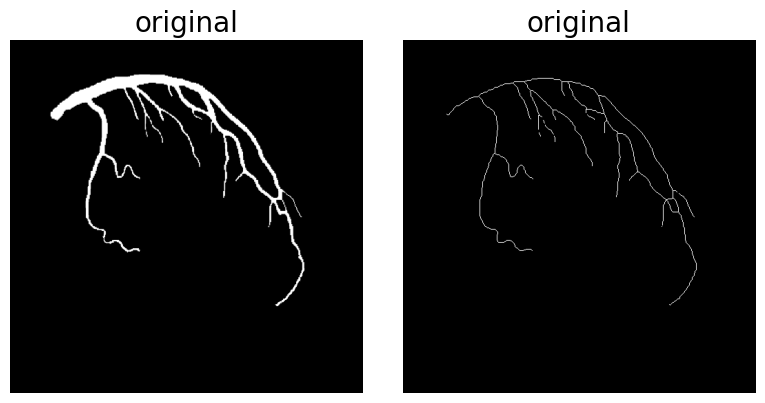

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(images_list[0], cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('original', fontsize=20)

fig.tight_layout()
plt.show()

## Model Architecture

In [ ]:
class Unet(nn.Module():
    def __init__(self):
        super().__init__()
        self.down = nn.Secuential([
            
        ])

## Loss Function

In [63]:
def ce(y, y_i):
    ep = 1e-8
    part1 = y_i * np.log(y+ep)
    part2 = (1 - y_i)*np.log(1-y+ep)
    return np.mean(-(part1+part2))

In [64]:
y = np.linspace(0,1, 10)
y_i = np.zeros(10)
y_i2 = np.ones(10)

r1 = ce(y, y_i)
r2 = ce(y, y_i2)

In [68]:
x = np.linspace(0,1,9).reshape(3,3)

In [69]:
x

array([[0.   , 0.125, 0.25 ],
       [0.375, 0.5  , 0.625],
       [0.75 , 0.875, 1.   ]])

In [72]:
y_1 = np.ones(9).reshape(3,3)

In [73]:
y_0 = np.zeros(9).reshape(3,3)

In [74]:
ce(x, y_1)

2.7168455508019154

In [65]:
r1

2.5393874205289735

In [66]:
r2

2.539387420528974

In [52]:
r1

array([       nan, 0.11778304, 0.25131443, 0.40546511, 0.58778666,
       0.81093022, 1.09861229, 1.5040774 , 2.19722458,        inf])

In [53]:
r2

array([       inf, 2.19722458, 1.5040774 , 1.09861229, 0.81093022,
       0.58778666, 0.40546511, 0.25131443, 0.11778304,        nan])

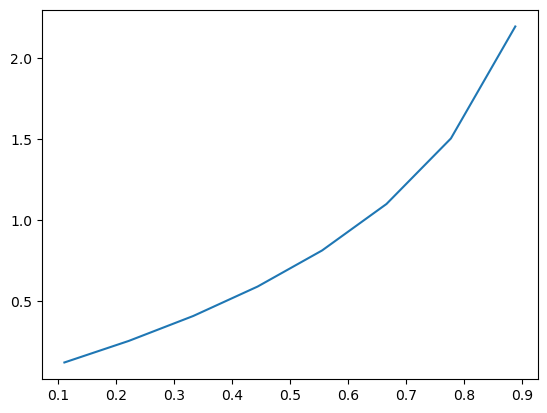

In [54]:
plt.plot(y, r1)

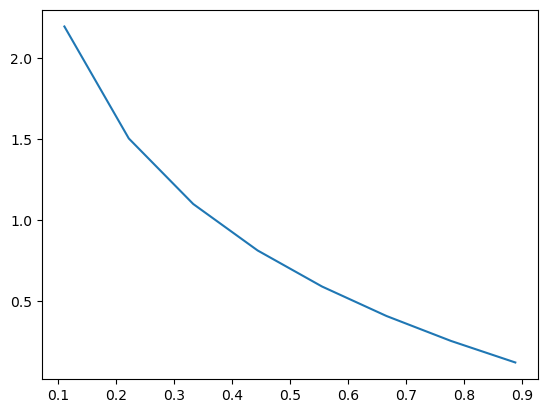

In [55]:
plt.plot(y, r2)